<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/keras_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# 신경망 구성하기
# Conv2D(filter,kernel_size,strides,activation,input_shape)
# filter = 필터 개수
# kernel_size = 필터의 크기
# strides = 풀링 필터를 이동시키는 간격

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
# hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose = 1)
hist = model.fit(X_train, Y_train, batch_size = 1, epochs=1, validation_split=0.4, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        

313/313 - 1s - loss: 0.0664 - accuracy: 0.9819 - 762ms/epoch - 2ms/step
test loss: 0.06641866266727448
test accuracy: 0.9818999767303467
n: 3654
1/1 [==============================] - 0s 67ms/step
predict:  [5]
True_value : 6


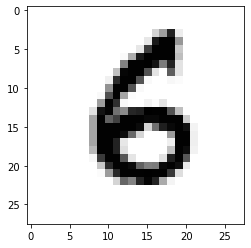

n: 6330
1/1 [==============================] - 0s 15ms/step
predict:  [2]
True_value : 0


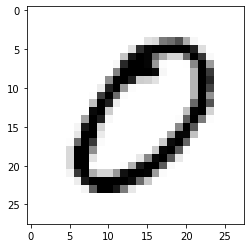

n: 4792
1/1 [==============================] - 0s 16ms/step
predict:  [8]
True_value : 3


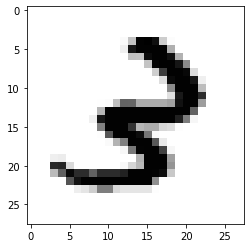

n: 5068
1/1 [==============================] - 0s 17ms/step
predict:  [4]
True_value : 7


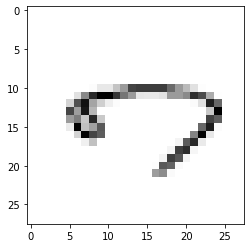

n: 3948
1/1 [==============================] - 0s 17ms/step
predict:  [6]
True_value : 7


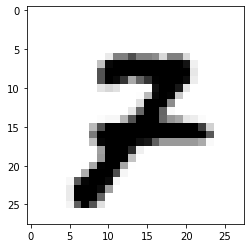

n: 3779
1/1 [==============================] - 0s 17ms/step
predict:  [1]
True_value : 6


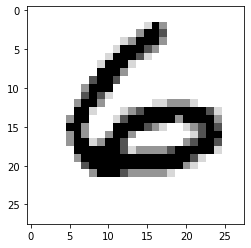

n: 9341
1/1 [==============================] - 0s 15ms/step
predict:  [2]
True_value : 6


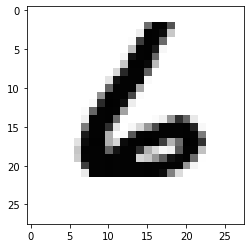

n: 9436
1/1 [==============================] - 0s 14ms/step
predict:  [0]
True_value : 4


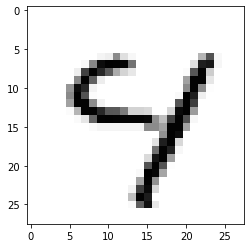

n: 389
1/1 [==============================] - 0s 14ms/step
predict:  [9]
True_value : 9


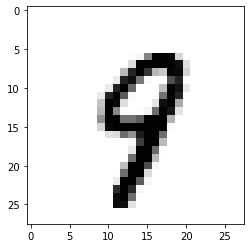

n: 1305
1/1 [==============================] - 0s 16ms/step
predict:  [1]
True_value : 9


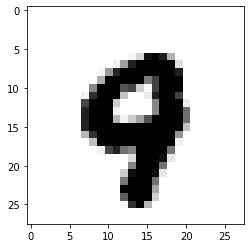

In [ ]:
# 평가
score = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", score[0])
print("test accuracy:", score[1])

# prediction과 맞는지 비교

for i in range(10):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,28,28,1)),axis=1))
  print("True_value :", Y_train[n])

  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

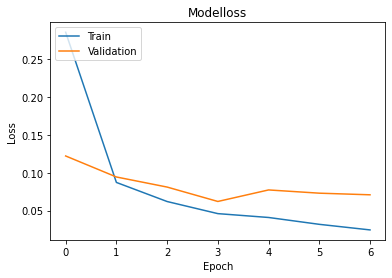

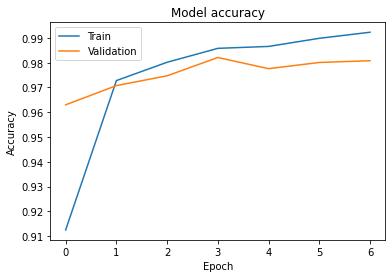

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

# 학습이 끝난 뒤 모델 저장
model.save('/content/drive/MyDrive/mnist_conv_e7.h5')

# 저장 된 모델 불러오기
model = keras.models.load_model('/content/drive/MyDrive/mnist_conv_e7.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        